In [73]:
## Code Header
## Notebook Name: FIFA Wage Prediction Analysis
## Objective: To understand how player attributes in association football lead to their weekly wages.
## Start Date: 8th April, 2020
## Data Sources
    # Source: FIFA 18 Complete Player Dataset - https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset
## Author(s): Soumya Halder
## Edits to be made
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Data cleaning and preparation for the analysis
    # EDA - Glean insights which might help design decisions
    # SciKit Learn
        # Linear Regression
        # Trees
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import json
import ast
from datetime import datetime
from sklearn.model_selection import train_test_split
import textstat
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing datasets which contains information about players attributes, personal data and position

attribute = pd.read_csv('Project Data/PlayerAttributeData.csv')
personal = pd.read_csv('Project Data/PlayerPersonalData.csv')
position = pd.read_csv('Project Data/PlayerPlayingPositionData.csv');

In [3]:
attribute.head()

,id_attribute,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11


In [4]:
# Correcting datatypes for attribute df
attribute.dtypes;
attribute = attribute.convert_objects(convert_numeric = True);

In [5]:
personal.head()

,id_personal,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [6]:
personal.dtypes;

In [7]:
position.head()

,id_position,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
position.dtypes;

In [9]:
# Joining 2 datasets at a time - personal & position
fifa_pp = pd.merge(personal, position, left_on = ['id_personal'], right_on = ['id_position'], how = 'inner')
fifa_pp.shape

(17981, 43)

In [10]:
# Joining the above result with the 3rd table attribute
fifa_ppa = pd.merge(fifa_pp, attribute, left_on = ['id_personal'], right_on = ['id_attribute'], how = 'inner')
fifa_ppa.shape

(17981, 79)

In [11]:
# Split preferred postion column to get the primary playing position for a player
fifa_splitcol = fifa_ppa['Preferred Positions'].str.split(' ', n = 2, expand=True)

# Adding the column to main dataset
fifa_ppa['Position'] = fifa_splitcol[0]

# Dropping original column from main dataset
fifa_ppa.drop(columns = ['Preferred Positions'], inplace = True) 

In [12]:
# Getting all unique values from the new column
fifa_ppa['Position'].unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

In [13]:
# Combining all positions into 4 major categories - goalkeeper, defender, midfielder, attacker
def player_pos (row):
    if row['Position'] == 'GK':
        return 'GK'
    if row['Position'] == 'CB' or row['Position'] == 'LB' or row['Position'] == 'RB' or row['Position'] == 'RWB' or row['Position'] == 'LWB':
        return 'DF'
    if row['Position'] == 'CM' or row['Position'] == 'RM' or row['Position'] == 'LM' or row['Position'] == 'CAM' or row['Position'] == 'CDM':
        return 'MF'
    return 'AT'

fifa_ppa['Playing Position'] = fifa_ppa.apply(lambda row: player_pos(row), axis=1)

In [14]:
# Converting the Wage & Value column into numeric data type
def convert_into_currency (value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)

fifa_ppa['Value'] = fifa_ppa['Value'].apply(lambda x: convert_into_currency(x))
fifa_ppa['Wage'] = fifa_ppa['Wage'].apply(lambda x: convert_into_currency(x))

In [77]:
# Length of the dataset
print('Length of DF dataset with NaN:', len(fifa_ppa))

Length of DF dataset with NaN: 17981


In [147]:
fifa_ppa.groupby('Playing Position').agg({'id_personal' : ['count']})

,id_personal
,count
Playing Position,
AT,3338
DF,5440
GK,2029
MF,7174


In [148]:
# Creating subsets of the data by playing positions
fifa_gk = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'GK']
fifa_df = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'DF']
fifa_mf = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'MF']
fifa_at = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'AT']

In [150]:
fifa_gk.isna().sum();
fifa_df.isna().sum();
fifa_mf.isna().sum();
fifa_at.isna().sum();

In [155]:
# Removing addtional columns and drop rows with NaN values
fifa18 = fifa_ppa.drop(['ID_x', 'Photo', 'Flag', 'Club Logo', 'Special', 'id_position', 'ID_y', 'id_attribute', 'GK diving', 'GK handling', 'GK kicking',
                        'GK positioning', 'GK reflexes', 'ID', 'Playing Position'], axis = 1)

fifa18.dropna(inplace = True)
fifa18.reset_index()
print('Length of DF dataset after removing NaN:', len(fifa18))

Length of DF dataset after removing NaN: 15148


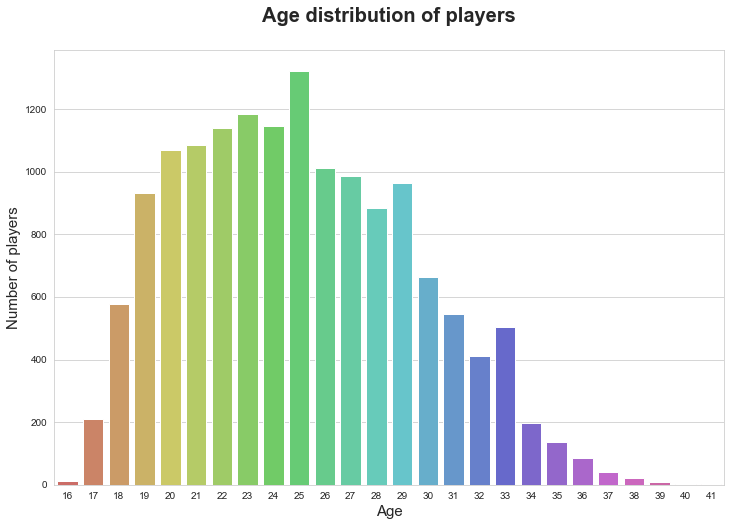

In [129]:
# Distribution of age
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Age', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();

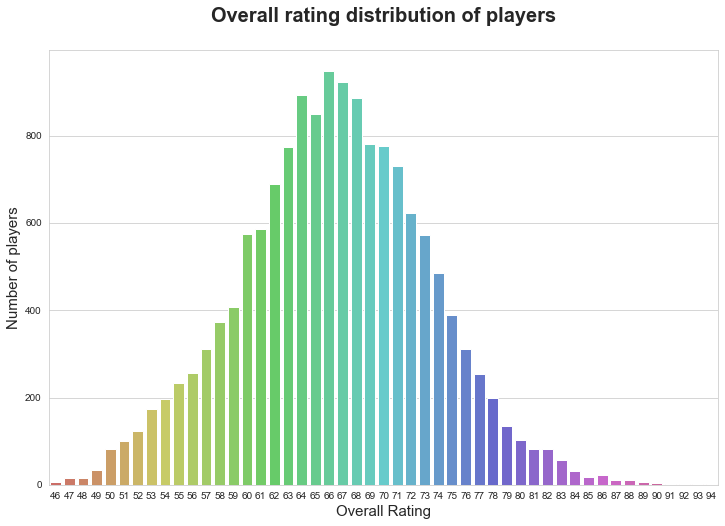

In [128]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Overall rating distribution of players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.countplot(x = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Number of players', fontsize = 15)
plt.show();

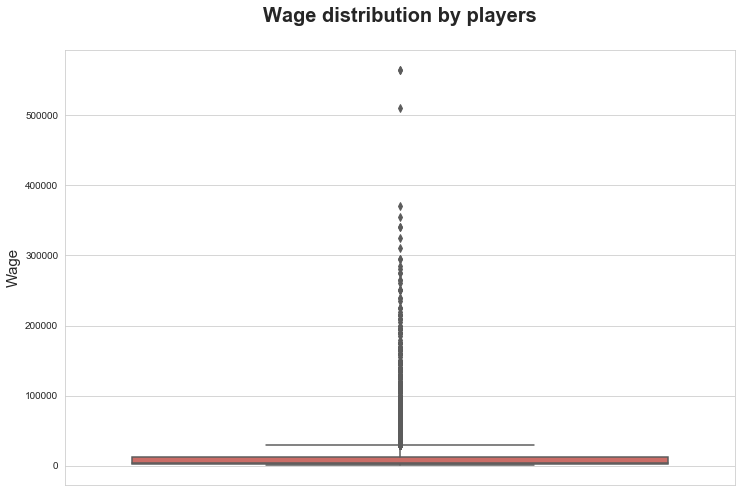

In [132]:
# Distribution of Overall Rating
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage distribution by players', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.boxplot(x = 'Wage', data = fifa18, palette = 'hls', orient = 'v');
plt.ylabel('Wage', fontsize = 15)
plt.show();

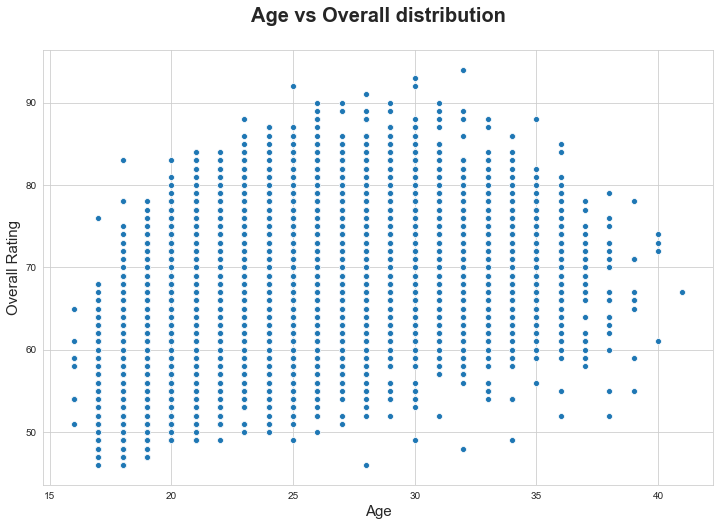

In [138]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Overall', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Overall Rating', fontsize = 15)
plt.show();

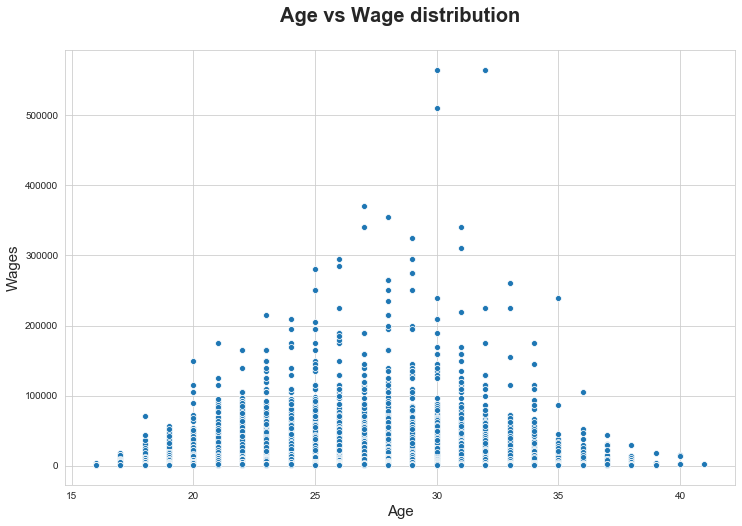

In [139]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Age vs Wage distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Age', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

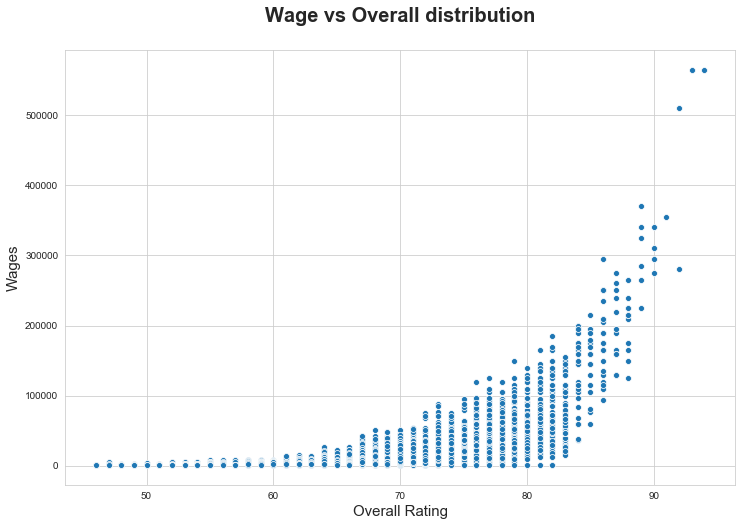

In [141]:
# Distribution of Wages
plt.figure(figsize = (12,8))
sns.set_style('whitegrid')
plt.title('Wage vs Overall distribution', fontsize = 20, fontweight = 'bold', y = 1.05,)
sns.scatterplot(x = 'Overall', y = 'Wage', data = fifa18, palette = 'hls');
plt.xlabel('Overall Rating', fontsize = 15)
plt.ylabel('Wages', fontsize = 15)
plt.show();

In [160]:
# Reassigning individual datasets withou NaN
fifa18_df = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'DF'].reset_index()
fifa18_mf = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'MF'].reset_index()
fifa18_at = fifa_ppa.loc[fifa_ppa['Playing Position'] == 'AT'].reset_index()